# La huella del suelo de los habitos de consumo y dieta en España
Consumo medio anual de una persona en España:
- Aceite: 10 l/persona/año (3 l/persona/año de girasol, resto 7 l oliva)
- Pan: 27 kg/persona/año vs patata 26 kg
- Fruta: naranja (17kg), melocoton (3kg), cereza (0.2kg), uva de mesa (2.1kg)
- Hortalizas: Cebolla (8kg), pimiento (5.7)
- Harina: 3.4kg (podemos asumir que es principalmente trigo) vs Harina de maiz
- Vino (1 kg de uva para 0.75l de vino): 10 l/persona/año

Kilos de suelo consumidos en tu dieta:
- Vaso de vino
- Tostada con aceite
- Racion de fruta (150gr)
- Tortilla de patatas (150gr)

Y si comieras aceite de oliva pero de un suelo de conservacion?

In [1]:
# Import necessary libraries
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

# Data for Soil Footprint of Different Foods (kg soil per kg food)
# Adding typical consumption data (grams per day)
soil_footprint_data = {
    'Food Item': ['Rice', 'Potatoes', 'Beer', 'Wine', 'Olive oil', 'Sunflower oil', 'Oranges', 'Peaches', 'Rye bread', 'Wheat bread'],
    'Soil Footprint (kg soil/kg food)': [1.20, 0.38, 0.6, 0.8, 5.00, 2.50, 0.83, 0.75, 1.5, 1.67],
    'Consumption (grams per day)': [120, 300, 500, 200, 20, 20, 200, 150, 50, 70]  # Example daily consumption in grams
}

# Convert data to DataFrame for easier handling
soil_footprint_df = pd.DataFrame(soil_footprint_data)

# Function to calculate soil footprint based on user choices and typical consumption
def calculate_total_soil_footprint(choices):
    total_loss_per_year = 0
    min_loss_per_year = 0
    footprint_by_item = {}  # To store footprints for individual items
    loss_by_item_per_year = {}  # To store soil loss per year for individual items

    for choice, options in choices.items():
        # Get the soil footprint and consumption data for the selected food
        selected_food_data = soil_footprint_df[soil_footprint_df['Food Item'] == choice].iloc[0]
        footprint_per_kg = selected_food_data['Soil Footprint (kg soil/kg food)']
        daily_consumption_grams = selected_food_data['Consumption (grams per day)']
        
        # Convert grams per day to kg per year and calculate total soil footprint and soil loss for the food
        annual_consumption_kg = (daily_consumption_grams / 1000) * 365  # Convert to kg/year
        total_loss_per_year += footprint_per_kg * annual_consumption_kg
        footprint_by_item[choice] = footprint_per_kg
        loss_by_item_per_year[choice] = footprint_per_kg * annual_consumption_kg

        # Calculate minimum footprint and minimum soil loss
        min_loss_per_year += min(
            [
                soil_footprint_df.loc[soil_footprint_df['Food Item'] == opt, 'Soil Footprint (kg soil/kg food)'].values[0] *
                (soil_footprint_df.loc[soil_footprint_df['Food Item'] == opt, 'Consumption (grams per day)'].values[0] / 1000 * 365)
                for opt in options
            ]
        )
    
    return total_loss_per_year, min_loss_per_year, footprint_by_item, loss_by_item_per_year

# Function to recommend food that would reduce total soil loss the most
def recommend_food_to_reduce_loss(selected_choices):
    non_selected_items = soil_footprint_df[~soil_footprint_df['Food Item'].isin(selected_choices.keys())]
    min_loss_item = None
    min_loss_value = float('inf')

    for _, row in non_selected_items.iterrows():
        footprint_per_kg = row['Soil Footprint (kg soil/kg food)']
        daily_consumption_grams = row['Consumption (grams per day)']
        annual_consumption_kg = (daily_consumption_grams / 1000) * 365
        total_loss = footprint_per_kg * annual_consumption_kg

        if total_loss < min_loss_value:
            min_loss_value = total_loss
            min_loss_item = row['Food Item']

    return min_loss_item, min_loss_value

# Function to plot the soil footprints and soil loss
def plot_soil_footprint(choices, total_loss_per_year, min_loss_per_year, footprint_by_item, loss_by_item_per_year):
    food_items = list(choices.keys())
    soil_footprints = [footprint_by_item[food] for food in food_items]
    weighted_losses = [loss_by_item_per_year[food] for food in food_items]
    
    # Plot 1: Soil footprint of selected food items (kg soil/kg food)
    plt.figure(figsize=(10, 5))
    plt.bar(food_items, soil_footprints, color='skyblue')
    plt.title('Soil Footprint of Selected Food Items (kg soil per kg food)')
    plt.ylabel('Soil Footprint (kg soil/kg food)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Total soil loss per year vs minimum possible loss (based on annual consumption)
    plt.figure(figsize=(6, 4))
    plt.bar(['Selected Total', 'Minimum Possible'], [total_loss_per_year, min_loss_per_year], color=['skyblue', 'lightgreen'])
    plt.title('Total Soil Loss vs Minimum Possible (kg soil per year)')
    plt.ylabel('Total Soil Loss (kg soil/year)')
    plt.tight_layout()
    plt.show()

    # Plot 3: Weighted soil loss of selected food items (kg soil per year)
    plt.figure(figsize=(10, 5))
    plt.bar(food_items, weighted_losses, color='orange')
    plt.title('Weighted Soil Loss of Selected Food Items (kg soil per year)')
    plt.ylabel('Soil Loss (kg soil/year)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Dropdown options for user to choose between similar foods
dropdown_options = {
    'Rice or Potatoes': ('Rice', 'Potatoes'),
    'Beer or Wine': ('Beer', 'Wine'),
    'Olive oil or Sunflower oil': ('Olive oil', 'Sunflower oil'),
    'Oranges or Peaches': ('Oranges', 'Peaches'),
    'Rye bread or Wheat bread': ('Rye bread', 'Wheat bread')
}

# Create a dropdown for each food pair
dropdowns = {}
for key, options in dropdown_options.items():
    dropdowns[key] = widgets.Dropdown(
        options=options,
        description=key,
        style={'description_width': 'initial'}
    )

# Output widget to display results
output = widgets.Output()

# Function to update total soil footprint based on user choices
def update_total_soil_footprint(change):
    # Get the selected choices from all dropdowns
    selected_choices = {dropdown.value: options for key, options in dropdown_options.items() for dropdown in dropdowns.values() if dropdown.value in options}
    
    # Calculate the total soil loss, minimum possible soil loss, and weighted footprints/losses by food
    total_loss_per_year, min_loss_per_year, footprint_by_item, loss_by_item_per_year = calculate_total_soil_footprint(selected_choices)
    
    # Recommend a food to reduce the footprint the most
    recommended_food, reduction = recommend_food_to_reduce_loss(selected_choices)
    
    # Display the results and plot
    output.clear_output()
    with output:
        print("You have selected the following food items:")
        for key in selected_choices.keys():
            print(f"{key}")
        print(f"\nTotal Soil Loss (kg soil/year): {total_loss_per_year:.4f}")
        print(f"Minimum Possible Soil Loss (kg soil/year): {min_loss_per_year:.4f}")
        print(f"By choosing the more sustainable options, you could reduce your soil loss by {total_loss_per_year - min_loss_per_year:.4f} kg/year.")
        
        print(f"\nRecommendation: If you switch to {recommended_food}, you could reduce your soil loss by an additional {reduction:.4f} kg/year.")
        
        # Plot the results
        plot_soil_footprint(selected_choices, total_loss_per_year, min_loss_per_year, footprint_by_item, loss_by_item_per_year)

# Attach the same event handler to all dropdowns
for dropdown in dropdowns.values():
    dropdown.observe(update_total_soil_footprint, names='value')

# Display the dropdowns and the output area
display(*dropdowns.values(), output)

# Set initial output to display the default selections
with output:
    initial_choices = {dropdown.value: options for key, options in dropdown_options.items() for dropdown in dropdowns.values() if dropdown.value in options}
    total_loss_per_year, min_loss_per_year, footprint_by_item, loss_by_item_per_year = calculate_total_soil_footprint(initial_choices)
    recommended_food, reduction = recommend_food_to_reduce_loss(initial_choices)
    print("You have selected the following food items:")
    for key in initial_choices.keys():
        print(f"{key}")
    print(f"\nTotal Soil Loss (kg soil/year): {total_loss_per_year:.4f}")
    print(f"Minimum Possible Soil Loss (kg soil/year): {min_loss_per_year:.4f}")
    print(f"By choosing the more sustainable options, you could reduce your soil loss by {total_loss_per_year - min_loss_per_year:.4f} kg/year.")
    
    print(f"\nRecommendation: If you switch to {recommended_food}, you could reduce your soil loss by an additional {reduction:.4f} kg/year.")
    
    # Plot the results
    plot_soil_footprint(initial_choices, total_loss_per_year, min_loss_per_year, footprint_by_item, loss_by_item_per_year)


Dropdown(description='Rice or Potatoes', options=('Rice', 'Potatoes'), style=DescriptionStyle(description_widt…

Dropdown(description='Beer or Wine', options=('Beer', 'Wine'), style=DescriptionStyle(description_width='initi…

Dropdown(description='Olive oil or Sunflower oil', options=('Olive oil', 'Sunflower oil'), style=DescriptionSt…

Dropdown(description='Oranges or Peaches', options=('Oranges', 'Peaches'), style=DescriptionStyle(description_…

Dropdown(description='Rye bread or Wheat bread', options=('Rye bread', 'Wheat bread'), style=DescriptionStyle(…

Output()

In [2]:
huella_suelo_ingredientes = {
    'Uva': 0.90,
    'Patata': 0.15,
    'Cebolla': 0.10,
    'Aceite': 3.50,
    'Trigo': 1.75,
    'Naranja': 0.20,
    'Melocotón': 0.25,
    'Cereza': 1.75,
    'Maiz': 0.25,
    'Pimiento': 0.25
}

Kilos de suelo consumidos al año por persona en total: 111.46 kg
                   Cultivo  Kilos de suelo consumidos (kg/persona/año)
0  Vid(Uva de mesa + Vino)                                      13.890
1                   Patata                                       3.900
2                  Cebolla                                       0.800
3   Olivo(Aceituna+Aceite)                                      33.250
4       Trigo (Harina+Pan)                                      53.200
5                  Naranja                                       3.400
6                Melocotón                                       0.750
7                   Cereza                                       0.350
8                     Maiz                                       0.500
9                 Pimiento                                       1.425


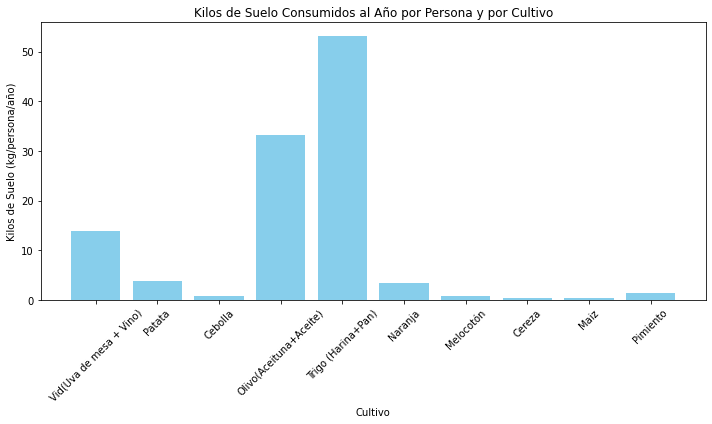

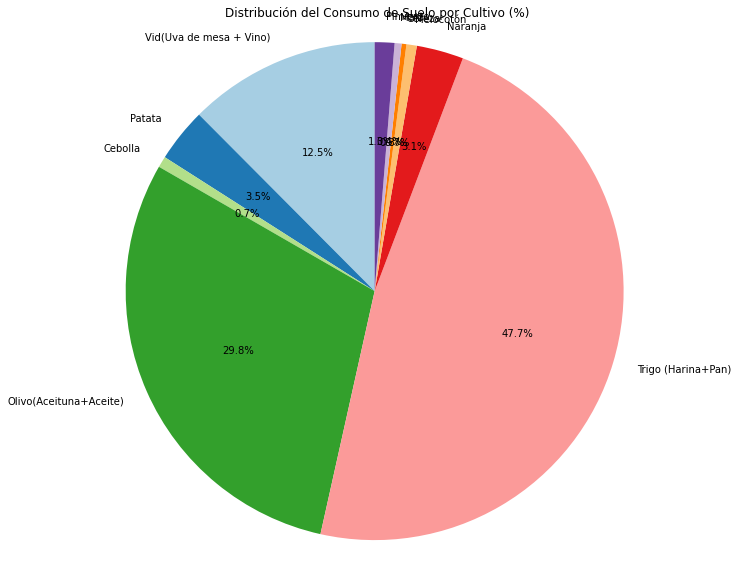

In [2]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd

# Datos: consumo medio anual por persona en España (kg) y huella de suelo (kg suelo/kg alimento)
data = {
    'Cultivo': ['Vid(Uva de mesa + Vino)','Patata', 'Cebolla', 'Olivo(Aceituna+Aceite)','Trigo (Harina+Pan)', 'Naranja', 'Melocotón', 'Cereza', 'Maiz', 'Pimiento'],
    'Consumo anual (kg/persona)': [10/0.75+2.1, 26, 8, 7+2.5, 30.4, 17, 3, 0.2, 2, 5.7],  # Datos de ejemplo
    'Huella de suelo (kg suelo/kg alimento)': [0.90, 0.15, 0.1, 3.50, 1.75, 0.2, 0.25, 1.75,0.25,0.25]  # Datos de ejemplo
}

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Calcular los kilos de suelo consumidos al año por cada cultivo
df['Kilos de suelo consumidos (kg/persona/año)'] = df['Consumo anual (kg/persona)'] * df['Huella de suelo (kg suelo/kg alimento)']

# Calcular el total de kilos de suelo consumidos al año por persona
total_suelo_consumido = df['Kilos de suelo consumidos (kg/persona/año)'].sum()

# Mostrar los resultados
print(f"Kilos de suelo consumidos al año por persona en total: {total_suelo_consumido:.2f} kg")
print(df[['Cultivo', 'Kilos de suelo consumidos (kg/persona/año)']])

# Gráfica de kilos de suelo consumidos por cada cultivo
plt.figure(figsize=(10, 6))
plt.bar(df['Cultivo'], df['Kilos de suelo consumidos (kg/persona/año)'], color='skyblue')
plt.title('Kilos de Suelo Consumidos al Año por Persona y por Cultivo')
plt.xlabel('Cultivo')
plt.ylabel('Kilos de Suelo (kg/persona/año)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfica del total de kilos de suelo consumidos al año
plt.figure(figsize=(10, 10))
plt.pie(df['Kilos de suelo consumidos (kg/persona/año)'], labels=df['Cultivo'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución del Consumo de Suelo por Cultivo (%)')
plt.axis('equal')
plt.show()


In [3]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Datos de las comidas y huella de suelo
comidas_data = {
    'Comida': ['Vaso de vino', 'Tortilla de patatas (con cebolla)', 'Tortilla de patatas (sin cebolla)', 
               'Tostada con aceite', 
               'Ración de fruta (naranja)', 'Ración de fruta (melocotón)', 'Ración de fruta (cereza)'],
    'Ingredientes': [
        {'Uva': 200},  # Vino: 200g de uvas
        {'Patata': 200, 'Cebolla': 50, 'Aceite': 30},  # Tortilla con cebolla
        {'Patata': 250, 'Aceite': 30},  # Tortilla sin cebolla
        {'Trigo': 70, 'Aceite': 15},  # Tostada con aceite
        {'Naranja': 150},  # Ración de fruta (naranja)
        {'Melocotón': 150},  # Ración de fruta (melocotón)
        {'Cereza': 150}  # Ración de fruta (cereza)
    ]
}

# Datos de huella de suelo para los ingredientes (kg suelo por kg alimento)
huella_suelo_ingredientes = {
    'Uva': 0.90,
    'Patata': 0.15,
    'Cebolla': 0.10,
    'Aceite': 3.50,
    'Trigo': 1.75,
    'Naranja': 0.20,
    'Melocotón': 0.25,
    'Cereza': 1.75,
    'Maiz': 0.25,
    'Pimiento': 0.25
}

# Función para calcular la huella de suelo de una comida
def calcular_huella_suelo_comida(ingredientes):
    huella_total = 0
    for ingrediente, cantidad in ingredientes.items():
        cantidad_kg = cantidad / 1000  # Convertir gramos a kg
        huella_suelo = huella_suelo_ingredientes[ingrediente] * cantidad_kg
        huella_total += huella_suelo
    return huella_total

# Función para calcular el peso total de la comida
def calcular_peso_total_comida(ingredientes):
    peso_total = sum(ingredientes.values())  # Sumar los gramos de todos los ingredientes
    return peso_total

# Función para actualizar las gráficas
def actualizar_graficas(comida_seleccionada):
    # Obtener los ingredientes de la comida seleccionada
    index = comidas_data['Comida'].index(comida_seleccionada)
    ingredientes_seleccionados = comidas_data['Ingredientes'][index]

    # Calcular la huella de suelo y el peso total de la comida
    huella_suelo_comida = calcular_huella_suelo_comida(ingredientes_seleccionados)
    peso_total_comida = calcular_peso_total_comida(ingredientes_seleccionados)

    # Mostrar los resultados
    print(f"\nHas seleccionado: {comida_seleccionada}")
    print(f"Huella de suelo de esta comida: {huella_suelo_comida:.4f} kg de suelo consumido")
    print(f"Peso total de la comida: {peso_total_comida} gramos")

    # Gráfica de huella de suelo por ingrediente
    ingredientes = list(ingredientes_seleccionados.keys())
    huellas_por_ingrediente = [huella_suelo_ingredientes[ingrediente] * (cantidad / 1000) for ingrediente, cantidad in ingredientes_seleccionados.items()]
    
    plt.figure(figsize=(10, 6))
    plt.bar(ingredientes, huellas_por_ingrediente, color='lightgreen')
    plt.title(f'Huella de Suelo por Ingrediente para {comida_seleccionada}')
    plt.xlabel('Ingrediente')
    plt.ylabel('Huella de Suelo (kg suelo)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calcular los porcentajes de peso de cada ingrediente respecto al peso total de la comida
    porcentajes_peso = [(cantidad / peso_total_comida) * 100 for cantidad in ingredientes_seleccionados.values()]

    # Calcular los porcentajes de huella de suelo de cada ingrediente respecto al total de huella de suelo
    huella_total = sum(huellas_por_ingrediente)
    porcentajes_huella = [(huella / huella_total) * 100 for huella in huellas_por_ingrediente]

    # Crear una figura con dos subplots para las gráficas comparativas
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfica de distribución de peso de los ingredientes
    axs[0].pie(porcentajes_peso, labels=ingredientes, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axs[0].set_title(f'Distribución del Peso de Ingredientes\n en {comida_seleccionada}')

    # Gráfica de distribución de huella de suelo de los ingredientes
    axs[1].pie(porcentajes_huella, labels=ingredientes, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axs[1].set_title(f'Distribución de la Huella de Suelo\n en {comida_seleccionada}')

    # Asegurar que ambas gráficas sean circulares
    axs[0].axis('equal')
    axs[1].axis('equal')

    plt.show()

# Crear el widget de selección
menu_desplegable = widgets.Dropdown(
    options=comidas_data['Comida'],
    description='Comida:',
    disabled=False
)

# Conectar el widget a la función que actualiza las gráficas
widgets.interact(actualizar_graficas, comida_seleccionada=menu_desplegable)

interactive(children=(Dropdown(description='Comida:', options=('Vaso de vino', 'Tortilla de patatas (con cebol…

<function __main__.actualizar_graficas(comida_seleccionada)>

In [4]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import matplotlib.patches as mpatches

# Datos de huella de suelo por cultivo en kg de suelo perdido por kg de cultivo
huella_suelo_cultivo = {
    'Uva': 0.90,
    'Patata': 0.15,
    'Cebolla': 0.10,
    'Aceituna': 3.50,
    'Trigo': 1.75,
    'Naranja': 0.20,
    'Melocoton': 0.25,
    'Cereza': 1.75,
    'Maiz': 0.25,
    'Pimiento': 0.25
}

# Datos de consumo anual (kg/persona)
consumo_anual = [10/0.75 + 2.1, 26, 8, 7 + 2.5, 30.4, 17, 3, 0.2, 2, 5.7]

# Lista de categorías de cultivos
frutas = ["Naranja", "Melocoton", "Uva", "Cereza", "Aceituna"]
hortalizas = ["Patata", "Pimiento", "Cebolla"]
cereales = ["Trigo", "Maiz"]

# Colores según la categoría
colores = {
    "Frutas": 'orange',
    "Hortalizas": 'green',
    "Cereales": 'blue'
}

# Asignación de colores a cada cultivo
colores_barras = {cultivo: colores['Frutas'] if cultivo in frutas 
                  else colores['Hortalizas'] if cultivo in hortalizas 
                  else colores['Cereales'] for cultivo in huella_suelo_cultivo.keys()}

# Cálculo de kilos de suelo perdidos (kg suelo perdido por persona)
def calcular_suelo_perdido():
    suelo_perdido = {cultivo: huella_suelo_cultivo[cultivo] * consumo 
                     for cultivo, consumo in zip(huella_suelo_cultivo.keys(), consumo_anual)}
    return suelo_perdido

# Opción de orden por categoría
def ordenar_por_categoria(data):
    categorias_ordenadas = frutas + hortalizas + cereales
    return {cultivo: data[cultivo] for cultivo in categorias_ordenadas}

# Opción de ordenar de mayor a menor
def ordenar_mayor_a_menor(data):
    return dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Gráfica de huella de suelo o kilos de suelo perdidos con leyenda
def graficar_huella_suelo_cultivos(data, tipo="huella del suelo", orden="mayor a menor"):
    plt.figure(figsize=(10, 6))
    
    # Seleccionar el tipo de datos a graficar
    if tipo == "kilos de suelo consumidos":
        data = calcular_suelo_perdido()
    
    # Ordenar los datos según la opción elegida
    if orden == "por categoria":
        datos = ordenar_por_categoria(data)
    else:
        datos = ordenar_mayor_a_menor(data)
    
    # Obtener colores para las barras
    colores_barras_ordenadas = [colores_barras[cultivo] for cultivo in datos.keys()]
    
    # Crear la gráfica
    plt.bar(datos.keys(), datos.values(), color=colores_barras_ordenadas)
    plt.xlabel('Cultivo')
    plt.ylabel('Huella de Suelo (kg suelo/kg cultivo)' if tipo == "huella del suelo" 
               else 'Kilos de Suelo Consumidos por Persona (kg/persona/año)')
    plt.title(f'{tipo.capitalize()} ({orden.capitalize()})')
    plt.xticks(rotation=45)
    
    # Añadir leyenda
    fruta_patch = mpatches.Patch(color=colores['Frutas'], label='Frutas')
    hortaliza_patch = mpatches.Patch(color=colores['Hortalizas'], label='Hortalizas')
    cereal_patch = mpatches.Patch(color=colores['Cereales'], label='Cereales')
    plt.legend(handles=[fruta_patch, hortaliza_patch, cereal_patch], title="Categoría")
    
    plt.show()

# Widgets para seleccionar el tipo de datos y el orden de la gráfica
tipo_selector = widgets.Dropdown(
    options=['huella del suelo', 'kilos de suelo consumidos'],
    value='huella del suelo',
    description='Datos:',
)

orden_selector = widgets.Dropdown(
    options=['de mayor a menor', 'por categoria'],
    value='de mayor a menor',
    description='Clasificacion:',
)

# Actualización de la gráfica interactiva
def actualizar_grafico(change=None):
    with output:
        output.clear_output(wait=True)
        graficar_huella_suelo_cultivos(huella_suelo_cultivo, tipo_selector.value, orden_selector.value)

# Vincular los widgets con la función de actualización
output = widgets.Output()

tipo_selector.observe(actualizar_grafico, names='value')
orden_selector.observe(actualizar_grafico, names='value')

# Mostrar widgets y gráfica interactiva
display(tipo_selector, orden_selector, output)

# Render inicial de la gráfica
with output:
    graficar_huella_suelo_cultivos(huella_suelo_cultivo, tipo_selector.value, orden_selector.value)


Dropdown(description='Datos:', options=('huella del suelo', 'kilos de suelo consumidos'), value='huella del su…

Dropdown(description='Clasificacion:', options=('de mayor a menor', 'por categoria'), value='de mayor a menor'…

Output()

In [5]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import matplotlib.patches as mpatches

# Datos de huella de suelo por cultivo en kg de suelo perdido por kg de cultivo
huella_suelo_cultivo = {
    'Uva': 0.90,
    'Patata': 0.15,
    'Cebolla': 0.10,
    'Aceituna': 3.50,
    'Trigo': 1.75,
    'Naranja': 0.20,
    'Melocoton': 0.25,
    'Cereza': 1.75,
    'Maiz': 0.25,
    'Pimiento': 0.25
}

# Datos de consumo anual (kg/persona)
consumo_anual = [10/0.75 + 2.1, 26, 8, 7 + 2.5, 30.4, 17, 3, 0.2, 2, 5.7]

# Lista de categorías de cultivos
frutas = ["Naranja", "Melocoton", "Uva", "Cereza", "Aceituna"]
hortalizas = ["Patata", "Pimiento", "Cebolla"]
cereales = ["Trigo", "Maiz"]

# Colores según la categoría
colores = {
    "Frutas": 'orange',
    "Hortalizas": 'green',
    "Cereales": 'blue'
}

# Asignación de colores a cada cultivo
colores_barras = {cultivo: colores['Frutas'] if cultivo in frutas 
                  else colores['Hortalizas'] if cultivo in hortalizas 
                  else colores['Cereales'] for cultivo in huella_suelo_cultivo.keys()}

# Cálculo de kilos de suelo perdidos (kg suelo perdido por persona)
def calcular_suelo_perdido():
    suelo_perdido = {cultivo: huella_suelo_cultivo[cultivo] * consumo 
                     for cultivo, consumo in zip(huella_suelo_cultivo.keys(), consumo_anual)}
    return suelo_perdido

# Opción de orden por categoría
def ordenar_por_categoria(data):
    categorias_ordenadas = frutas + hortalizas + cereales
    return {cultivo: data[cultivo] for cultivo in categorias_ordenadas}

# Opción de ordenar de mayor a menor
def ordenar_mayor_a_menor(data):
    return dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Gráficas de huella de suelo y kilos de suelo consumidos con leyenda
def graficar_huella_y_consumo_suelo(orden="mayor a menor"):
    # Obtener los datos de huella y de kilos consumidos
    huella = huella_suelo_cultivo
    kilos_suelo_perdido = calcular_suelo_perdido()
    
    # Ordenar los datos
    if orden == "por categoria":
        huella_ordenada = ordenar_por_categoria(huella)
        kilos_ordenados = ordenar_por_categoria(kilos_suelo_perdido)
    else:
        huella_ordenada = ordenar_mayor_a_menor(huella)
        kilos_ordenados = ordenar_mayor_a_menor(kilos_suelo_perdido)
    
    # Obtener colores para las barras
    colores_huella = [colores_barras[cultivo] for cultivo in huella_ordenada.keys()]
    colores_kilos = [colores_barras[cultivo] for cultivo in kilos_ordenados.keys()]

    # Crear la figura con dos gráficas de barras
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico de barras - Huella de Suelo
    axs[0].bar(huella_ordenada.keys(), huella_ordenada.values(), color=colores_huella)
    axs[0].set_xlabel('Cultivo')
    axs[0].set_ylabel('Huella de Suelo (kg suelo perdido/kg cultivo)')
    axs[0].set_title('Huella de Suelo por Cultivo')
    axs[0].tick_params(axis='x', rotation=45)

    # Gráfico de barras - Kilos de Suelo Consumidos
    axs[1].bar(kilos_ordenados.keys(), kilos_ordenados.values(), color=colores_kilos)
    axs[1].set_xlabel('Cultivo')
    axs[1].set_ylabel('Kilos de Suelo Consumidos por Persona (kg/persona/año)')
    axs[1].set_title('Kilos de Suelo Consumidos por persona al año')
    axs[1].tick_params(axis='x', rotation=45)

    # Añadir leyenda
    fruta_patch = mpatches.Patch(color=colores['Frutas'], label='Frutas')
    hortaliza_patch = mpatches.Patch(color=colores['Hortalizas'], label='Hortalizas')
    cereal_patch = mpatches.Patch(color=colores['Cereales'], label='Cereales')
    axs[0].legend(handles=[fruta_patch, hortaliza_patch, cereal_patch], title="Categoría")
    axs[1].legend(handles=[fruta_patch, hortaliza_patch, cereal_patch], title="Categoría")

    plt.tight_layout()
    plt.show()

# Widgets para seleccionar el orden de las gráficas
orden_selector = widgets.Dropdown(
    options=['mayor a menor', 'por categoria'],
    value='mayor a menor',
    description='Clasificacion:',
)

# Actualización de la gráfica interactiva
def actualizar_grafico(change=None):
    with output:
        output.clear_output(wait=True)
        graficar_huella_y_consumo_suelo(orden_selector.value)

# Vincular el widget con la función de actualización
output = widgets.Output()

orden_selector.observe(actualizar_grafico, names='value')

# Mostrar widgets y gráficas
display(orden_selector, output)

# Render inicial de las gráficas
with output:
    graficar_huella_y_consumo_suelo(orden_selector.value)


Dropdown(description='Clasificacion:', options=('mayor a menor', 'por categoria'), value='mayor a menor')

Output()